In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
N = 4

areas  = data[:, 0].reshape(N, 1)
prices = data[:, 1].reshape(N,)

# vector [1, area]
features = np.hstack([np.ones((N,1)), areas])
print('features: \n', features)
print('prices: \n', prices)

features: 
 [[1.  6.7]
 [1.  4.6]
 [1.  3.5]
 [1.  5.5]]
prices: 
 [9.1 5.9 4.6 6.7]


In [2]:
# [b, w]
theta = np.array([0.049, -0.34])
print('theta: \n', theta)

theta: 
 [ 0.049 -0.34 ]


In [3]:
# forward
def predict(x, theta):
    return x.T.dot(theta)

# compute gradient
def gradient(y_hat, y, x):
    dtheta = 2*x*(y_hat-y)    
    return dtheta

# update weights
def update_weight(theta, lr, dtheta):
    dtheta_new = theta - lr*dtheta    
    return dtheta_new

In [4]:
# params
lr = 0.01
epoch_max = 10

# logging
losses = []

for epoch in range(epoch_max):    
    for i in range(N):        
        # get a sample
        x = features[i,:]
        y = prices[i]
        
        # predict y_hat
        y_hat = predict(x, theta)

        # compute loss
        loss = (y_hat-y)*(y_hat-y)
        losses.append(loss)
        
        # compute gradient
        dtheta = gradient(y_hat, y, x)

        # update weights
        theta = update_weight(theta, lr, dtheta)
        
print('theta: \n', theta)

theta: 
 [0.2335058  1.21100306]


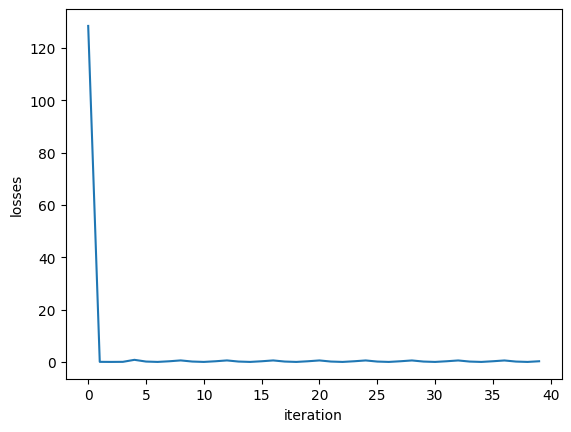

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses) # test with losses[3:]
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

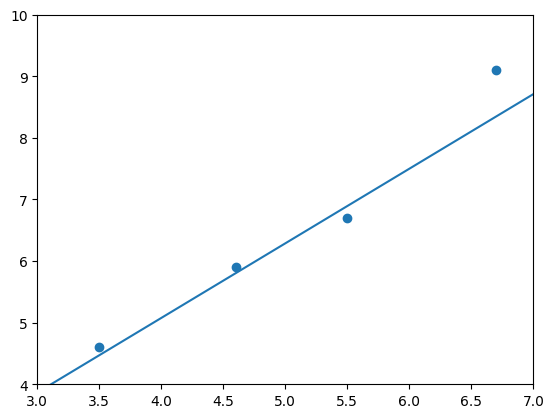

In [6]:
x_data = range(2, 8)

predicted_b, predicted_w = theta
y_data = [x*predicted_w + predicted_b for x in x_data]
plt.plot(x_data, y_data)
#--------------------------------------
plt.scatter(areas, prices)
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()